In [23]:
import numpy as np
import pandas as pd
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from data_preprocessing import analyze_data_quality,detect_outliers,plot_outliers,handle_outliers

In [24]:
# Define tickers and fetch data
tickers = ['AAPL', 'GOOGL', 'IBM','AMZN']  
data = []
start_date='2020-01-01'
end_date='2023-01-01'

aapl_data = yf.download('AAPL', start=start_date, end=end_date)
googl_data = yf.download('GOOGL', start=start_date, end=end_date)
IBM_data = yf.download('IBM', start=start_date, end=end_date)
amzn_data = yf.download('AMZN', start=start_date, end=end_date)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'missing_values': Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64, 'missing_percentage': Price      Ticker
Adj Close  AAPL      0.0
Close      AAPL      0.0
High       AAPL      0.0
Low        AAPL      0.0
Open       AAPL      0.0
Volume     AAPL      0.0
dtype: float64, 'descriptive_stats': Price    Adj Close       Close        High         Low        Open  \
Ticker        AAPL        AAPL        AAPL        AAPL        AAPL   
count   756.000000  756.000000  756.000000  756.000000  756.000000   
mean    127.940988  130.311812  131.892775  128.614983  130.231998   
std      30.494847   30.566496   30.841435   30.287325   30.596429   
min      54.509762   56.092499   57.125000   53.152500   57.020000   
25%     112.981407  115.739374  117.275000  114.129997  115.924374   
50%     133.331619  135.379997  137.200005  133.750000  135.794998   
75%     148.579079  150.

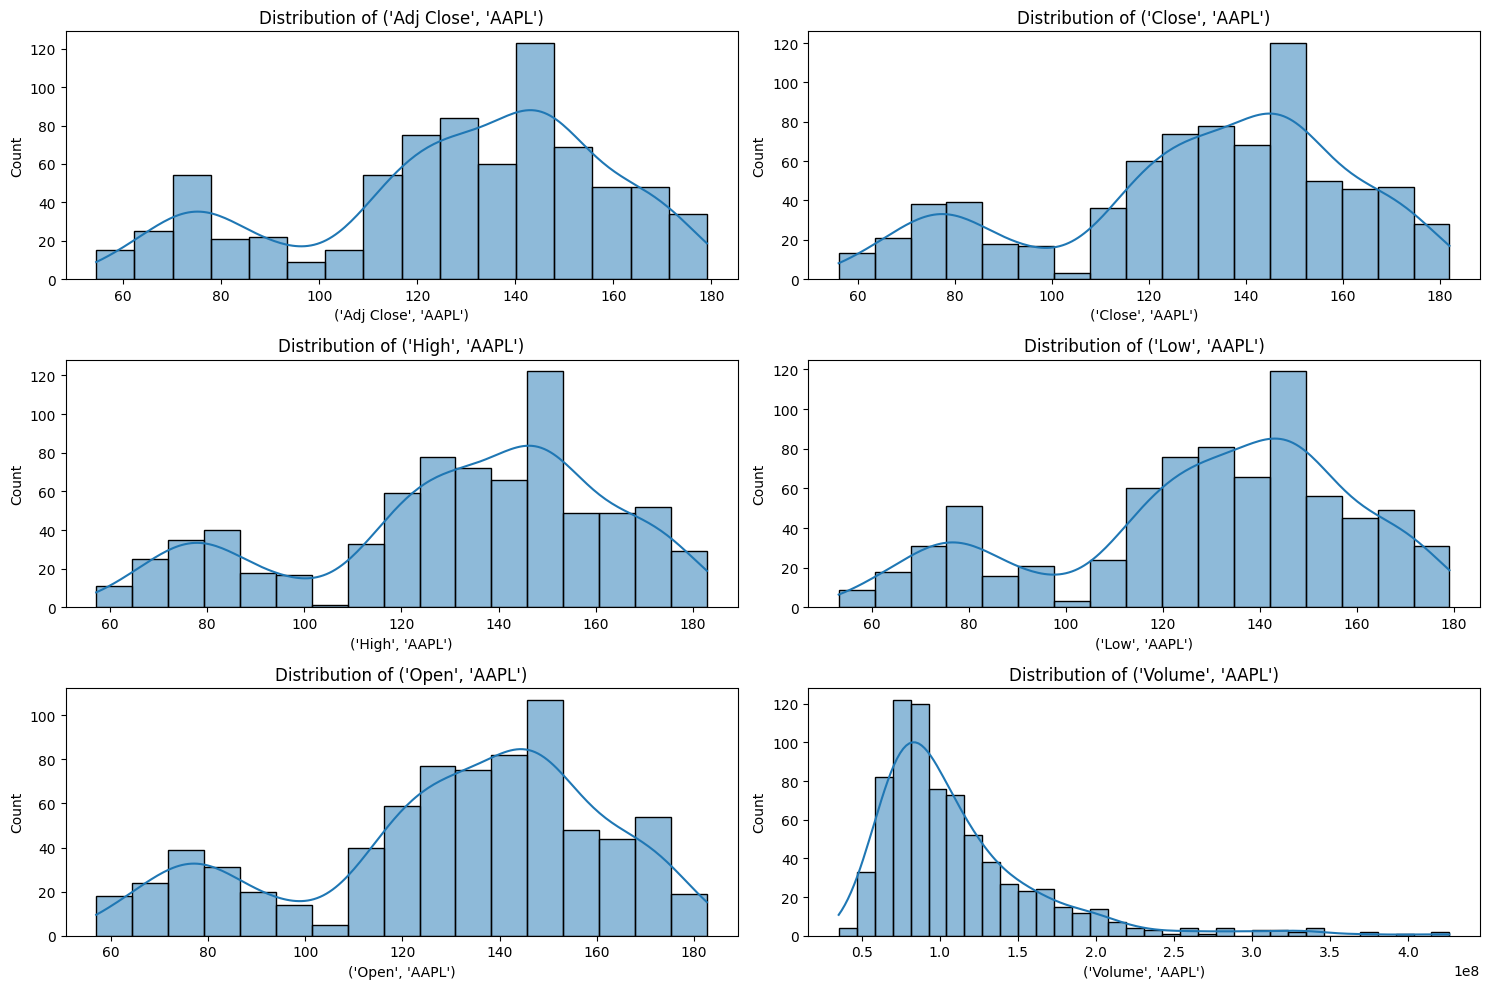

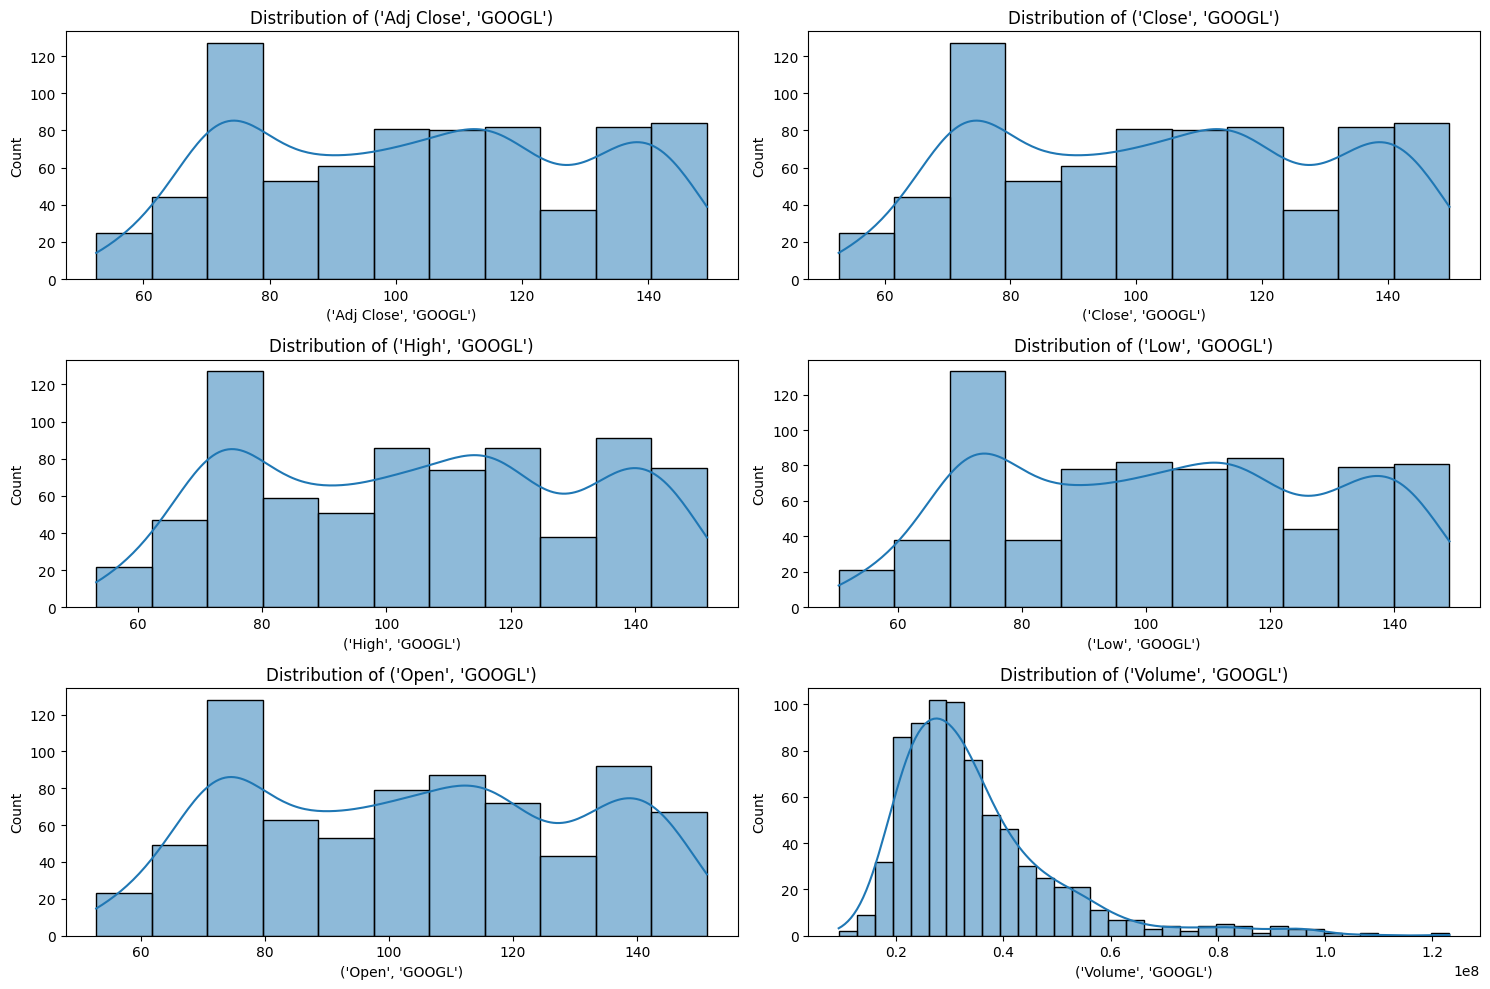

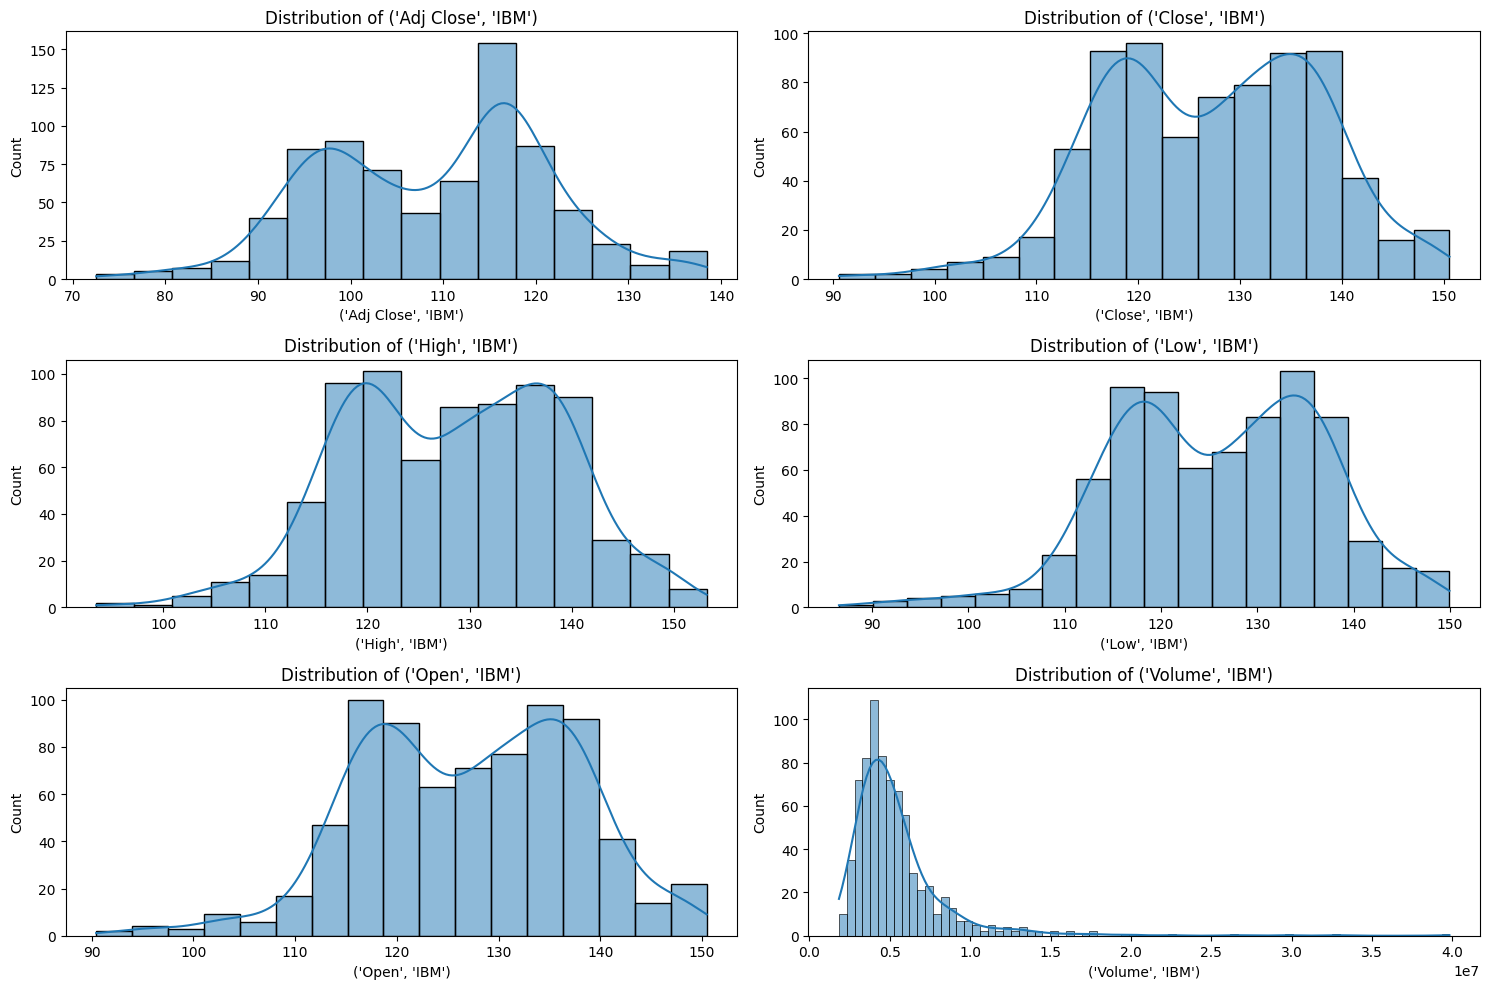

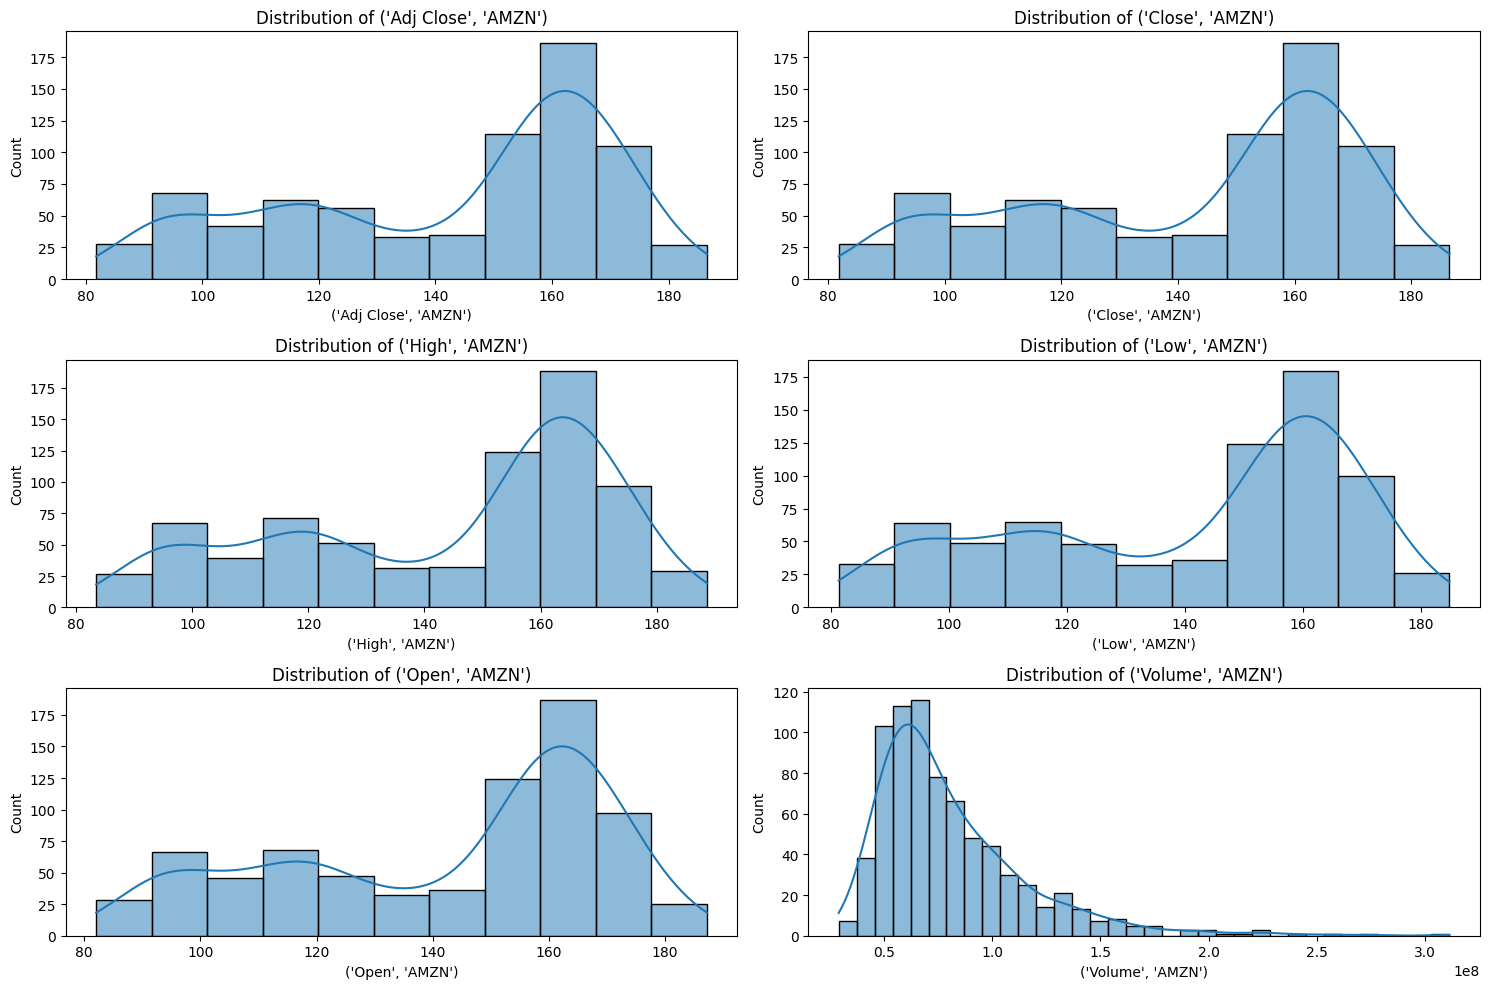

In [25]:
print(analyze_data_quality(aapl_data))
print(analyze_data_quality(googl_data))
print(analyze_data_quality(IBM_data))
print(analyze_data_quality(amzn_data))

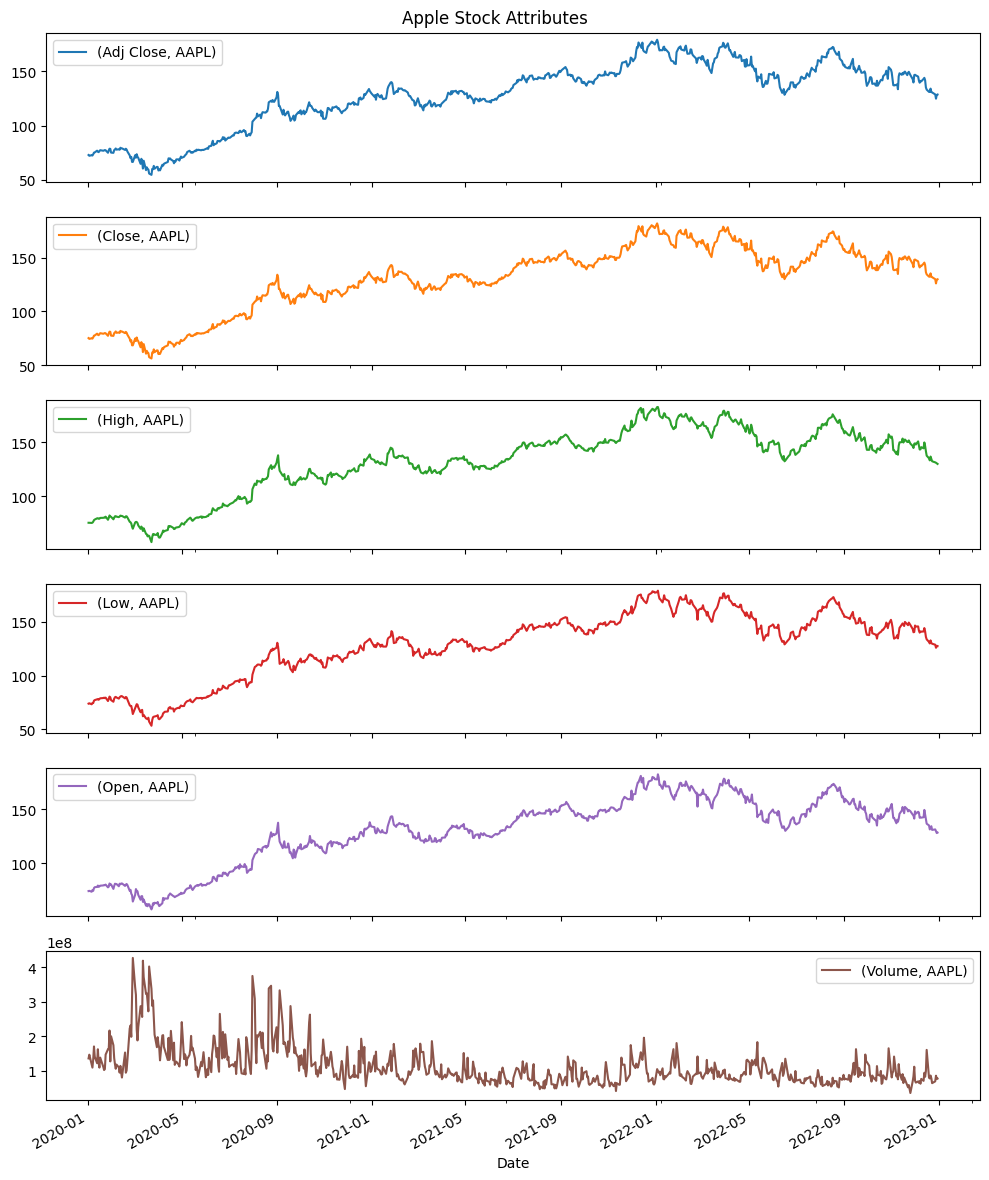

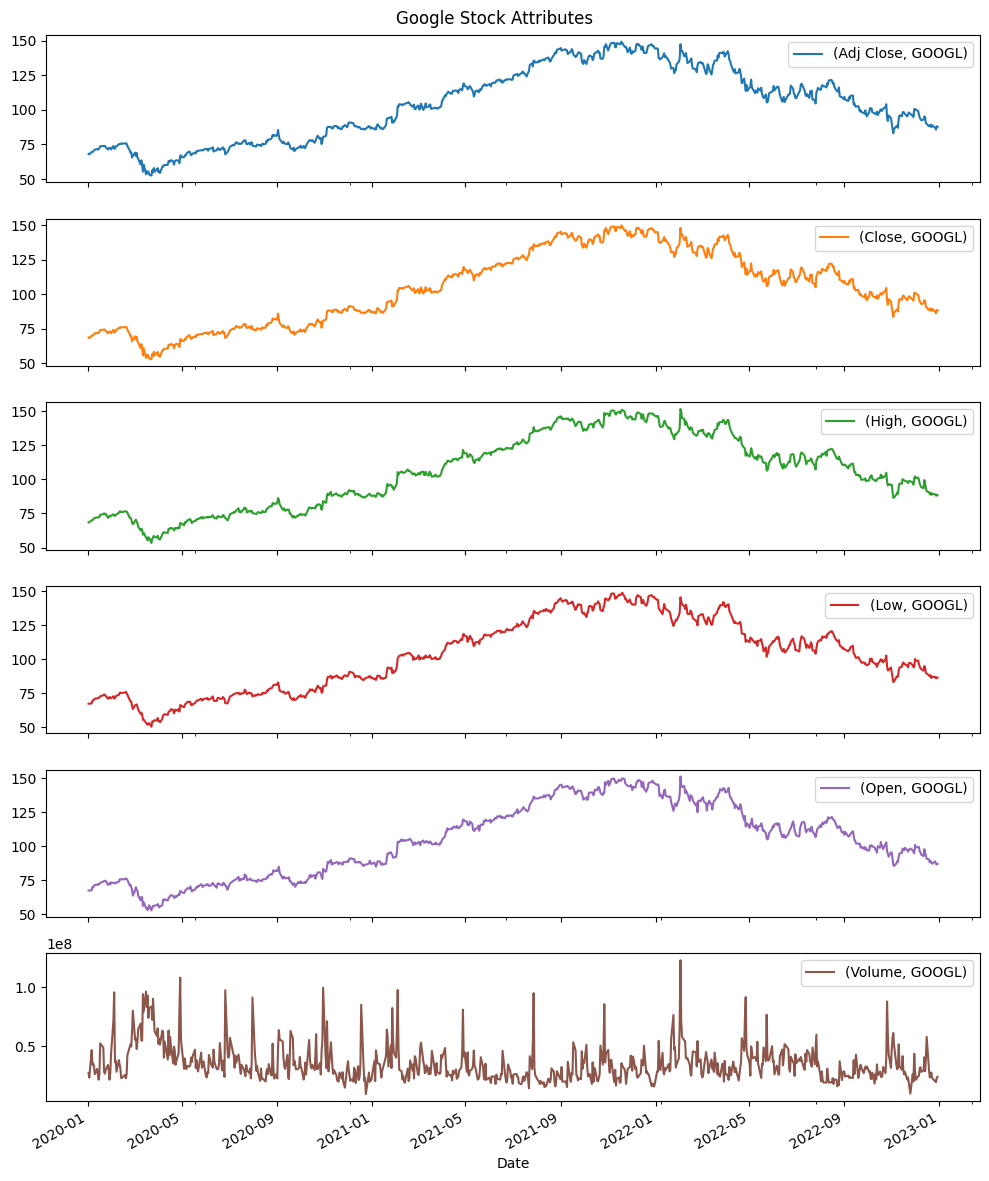

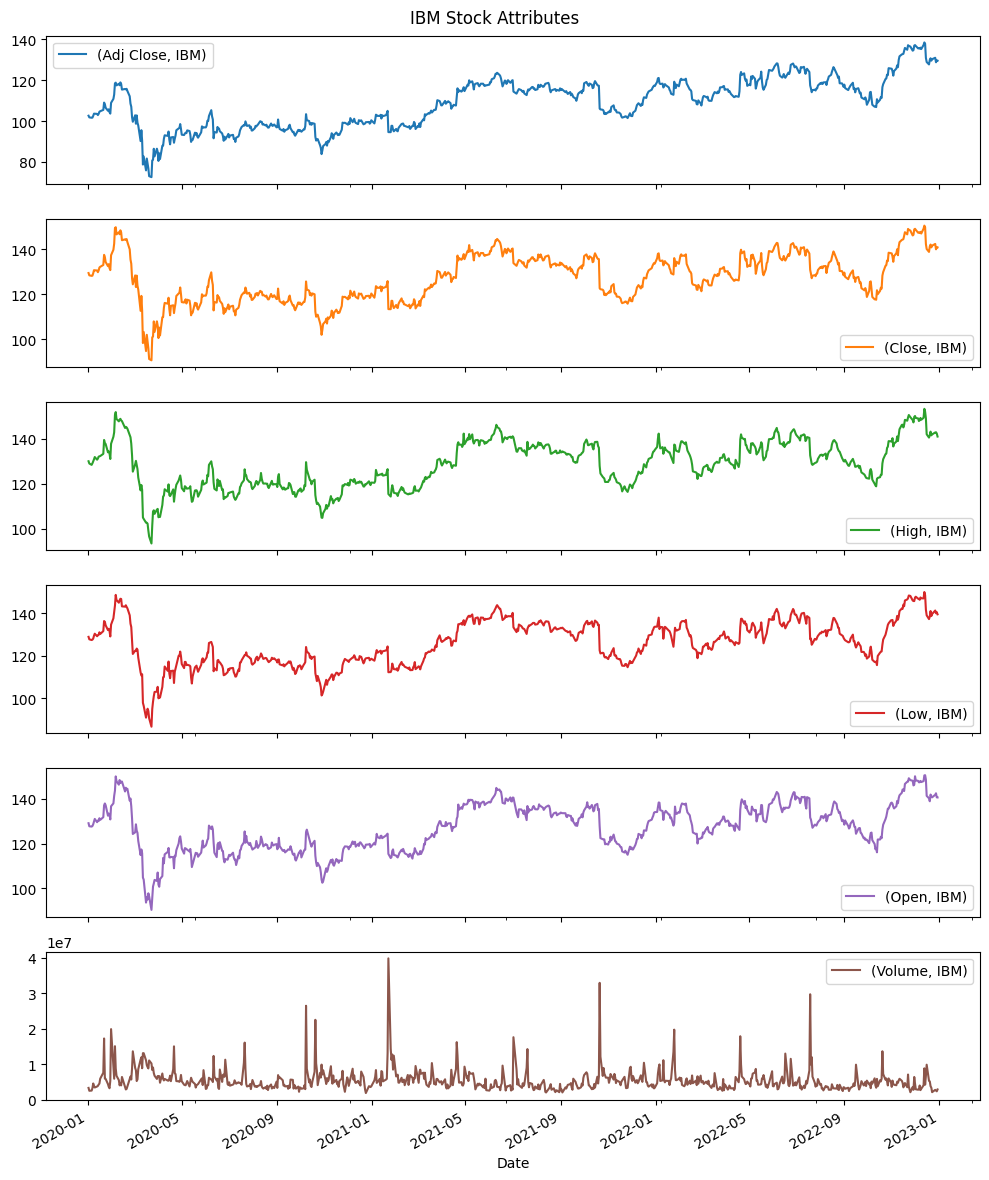

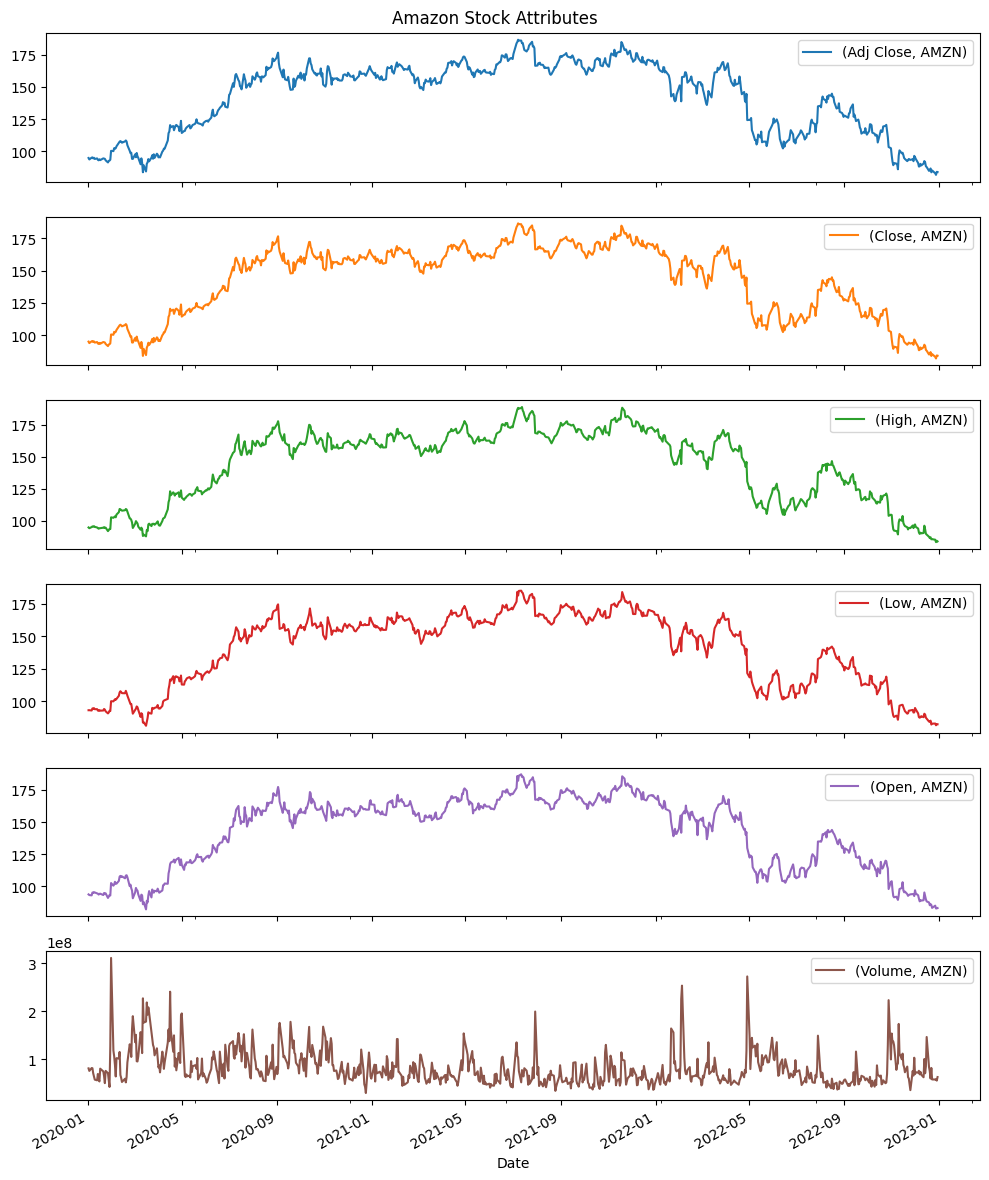

In [26]:
import matplotlib.pyplot as plt

# Plot AAPL data
aapl_data.plot(subplots=True, figsize=(10, 12))
plt.suptitle("Apple Stock Attributes")  # Add a title for the entire figure
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Plot GOOGL data
googl_data.plot(subplots=True, figsize=(10, 12))
plt.suptitle("Google Stock Attributes")
plt.tight_layout()
plt.show()

# Plot IBM data
IBM_data.plot(subplots=True, figsize=(10, 12))
plt.suptitle("IBM Stock Attributes")
plt.tight_layout()
plt.show()

# Plot AMZN data
amzn_data.plot(subplots=True, figsize=(10, 12))
plt.suptitle("Amazon Stock Attributes")
plt.tight_layout()
plt.show()

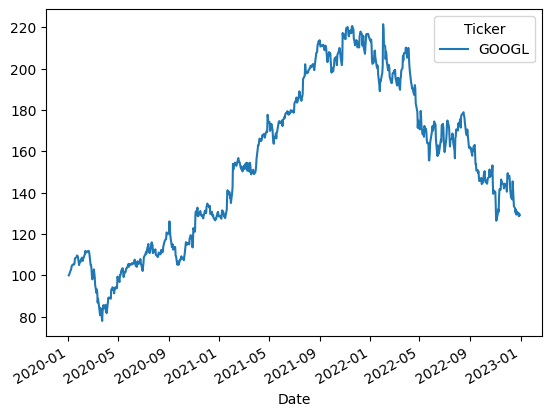

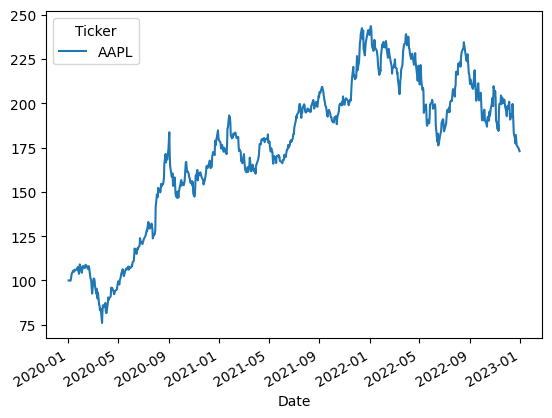

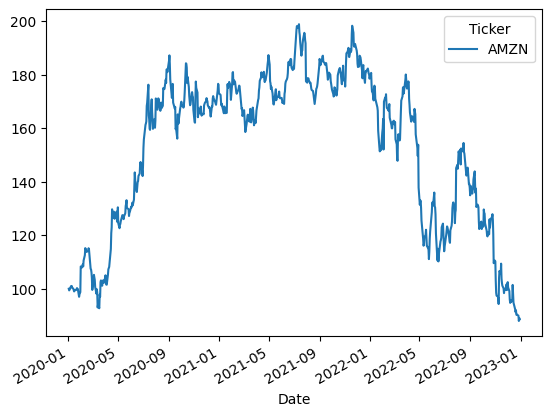

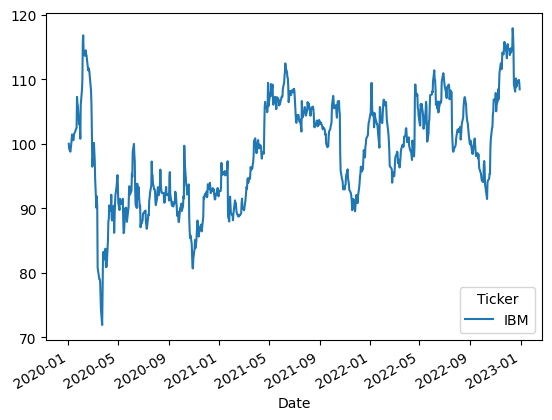

In [27]:
# Normalizing and comparison
# Both stocks start from 100
normalized_google = googl_data.High.div(googl_data.High.iloc[0]).mul(100)
normalized_apple = aapl_data.High.div(aapl_data.High.iloc[0]).mul(100)
normalized_amazon = amzn_data.High.div(amzn_data.High.iloc[0]).mul(100)
normalized_ibm = IBM_data.High.div(IBM_data.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_apple.plot()
normalized_amazon.plot()
normalized_ibm.plot()
plt.show()


Analyzing outliers for Google:

Outlier Statistics:

('Adj Close', 'GOOGL'):
Number of outliers: 0
Lower bound: 5.06
Upper bound: 199.40

('Close', 'GOOGL'):
Number of outliers: 0
Lower bound: 5.08
Upper bound: 200.13

('High', 'GOOGL'):
Number of outliers: 0
Lower bound: 4.70
Upper bound: 203.35

('Low', 'GOOGL'):
Number of outliers: 0
Lower bound: 3.52
Upper bound: 199.58

('Open', 'GOOGL'):
Number of outliers: 0
Lower bound: 5.01
Upper bound: 200.31

('Volume', 'GOOGL'):
Number of outliers: 42
Lower bound: 2111750.00
Upper bound: 63209750.00

Generating box plots...


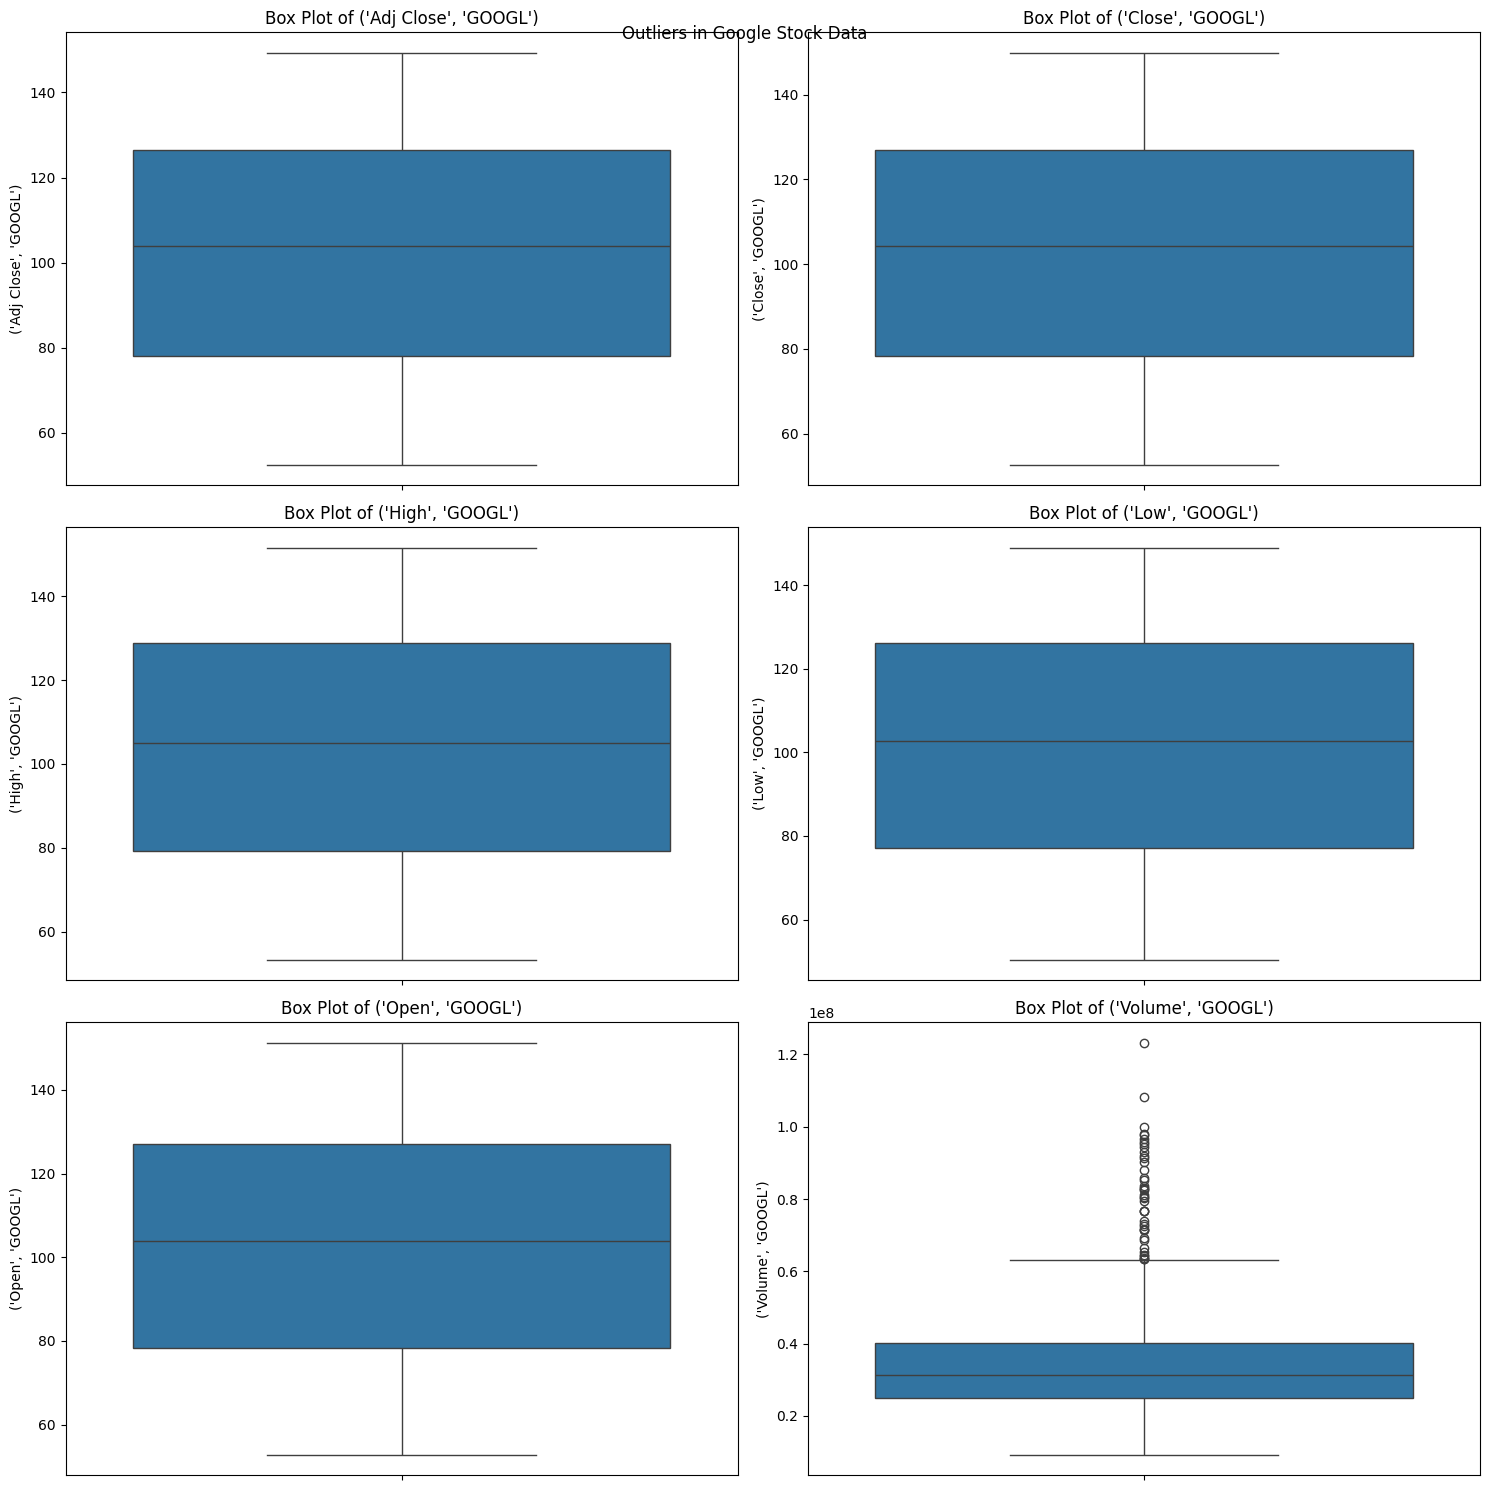


Handling outliers...

Outlier Count Comparison (Before -> After):
('Adj Close', 'GOOGL'): 0 -> 0
('Close', 'GOOGL'): 0 -> 0
('High', 'GOOGL'): 0 -> 0
('Low', 'GOOGL'): 0 -> 0
('Open', 'GOOGL'): 0 -> 0
('Volume', 'GOOGL'): 42 -> 0


In [28]:
print(f"\nAnalyzing outliers for Google:")
# Detect outliers using IQR method
outliers = detect_outliers(googl_data, method='iqr', threshold=1.5)
# Print outlier statistics
print("\nOutlier Statistics:")
for column, stats in outliers.items():
    print(f"\n{column}:")
    print(f"Number of outliers: {stats['outlier_count']}")
    if 'lower_bound' in stats:
        print(f"Lower bound: {stats['lower_bound']:.2f}")
        print(f"Upper bound: {stats['upper_bound']:.2f}")
# Visualize outliers using box plots
print("\nGenerating box plots...")
plot_outliers(googl_data)
plt.suptitle(f'Outliers in Google Stock Data')
plt.show()

# Handle outliers using clipping method
print("\nHandling outliers...")
googl_data = handle_outliers(googl_data, method='clip')
# Verify outlier handling
outliers_after = detect_outliers(googl_data, method='iqr', threshold=1.5)
    
# Compare before and after
print("\nOutlier Count Comparison (Before -> After):")
for column in outliers.keys():
        before_count = outliers[column]['outlier_count']
        after_count = outliers_after[column]['outlier_count']
        print(f"{column}: {before_count} -> {after_count}")


Analyzing outliers for Apple:

Outlier Statistics:

('Adj Close', 'AAPL'):
Number of outliers: 7
Lower bound: 59.58
Upper bound: 201.98

('Close', 'AAPL'):
Number of outliers: 13
Lower bound: 63.29
Upper bound: 203.15

('High', 'AAPL'):
Number of outliers: 14
Lower bound: 65.33
Upper bound: 203.84

('Low', 'AAPL'):
Number of outliers: 13
Lower bound: 61.78
Upper bound: 201.38

('Open', 'AAPL'):
Number of outliers: 18
Lower bound: 64.42
Upper bound: 201.76

('Volume', 'AAPL'):
Number of outliers: 41
Lower bound: -3537300.00
Upper bound: 209534700.00

Generating box plots...


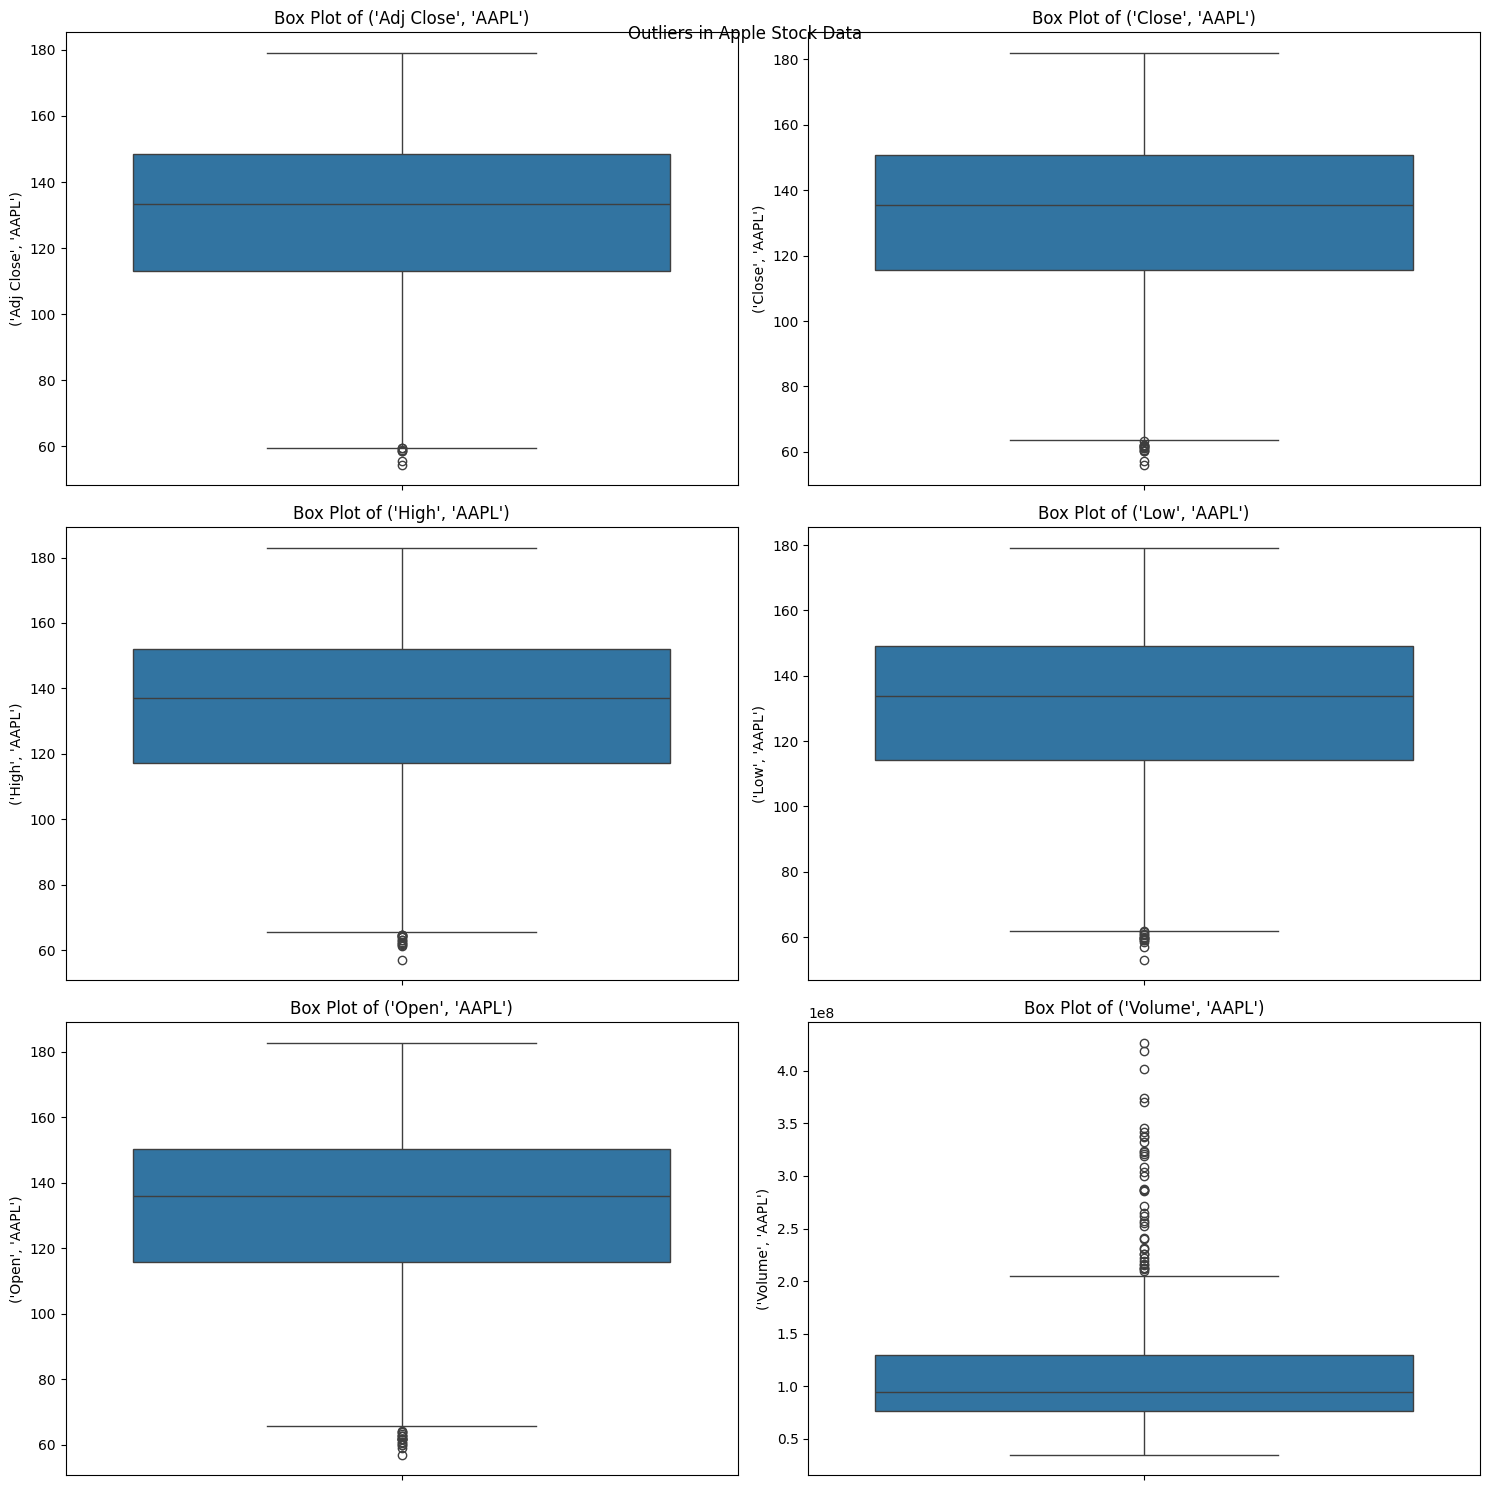


Handling outliers...

Outlier Count Comparison (Before -> After):
('Adj Close', 'AAPL'): 7 -> 0
('Close', 'AAPL'): 13 -> 0
('High', 'AAPL'): 14 -> 0
('Low', 'AAPL'): 13 -> 0
('Open', 'AAPL'): 18 -> 0
('Volume', 'AAPL'): 41 -> 0


In [29]:
print(f"\nAnalyzing outliers for Apple:")
# Detect outliers using IQR method
outliers = detect_outliers(aapl_data, method='iqr', threshold=1.5)
# Print outlier statistics
print("\nOutlier Statistics:")
for column, stats in outliers.items():
    print(f"\n{column}:")
    print(f"Number of outliers: {stats['outlier_count']}")
    if 'lower_bound' in stats:
        print(f"Lower bound: {stats['lower_bound']:.2f}")
        print(f"Upper bound: {stats['upper_bound']:.2f}")
# Visualize outliers using box plots
print("\nGenerating box plots...")
plot_outliers(aapl_data)
plt.suptitle(f'Outliers in Apple Stock Data')
plt.show()

# Handle outliers using clipping method
print("\nHandling outliers...")
aapl_data = handle_outliers(aapl_data, method='clip')
# Verify outlier handling
outliers_after = detect_outliers(aapl_data, method='iqr', threshold=1.5)
    
# Compare before and after
print("\nOutlier Count Comparison (Before -> After):")
for column in outliers.keys():
        before_count = outliers[column]['outlier_count']
        after_count = outliers_after[column]['outlier_count']
        print(f"{column}: {before_count} -> {after_count}")

Analyzin Outliers for the IBM Stock Data

('Adj Close', 'IBM')
 Number of Outliers : 0
 Lower Bound : 69.64
 Upper Bound : 146.58

('Close', 'IBM')
 Number of Outliers : 2
 Lower Bound : 93.77
 Upper Bound : 160.68

('High', 'IBM')
 Number of Outliers : 1
 Lower Bound : 94.33
 Upper Bound : 162.73

('Low', 'IBM')
 Number of Outliers : 3
 Lower Bound : 92.79
 Upper Bound : 159.64

('Open', 'IBM')
 Number of Outliers : 1
 Lower Bound : 93.49
 Upper Bound : 160.79

('Volume', 'IBM')
 Number of Outliers : 52
 Lower Bound : 376201.38
 Upper Bound : 9340508.38

 Plotting Outliers


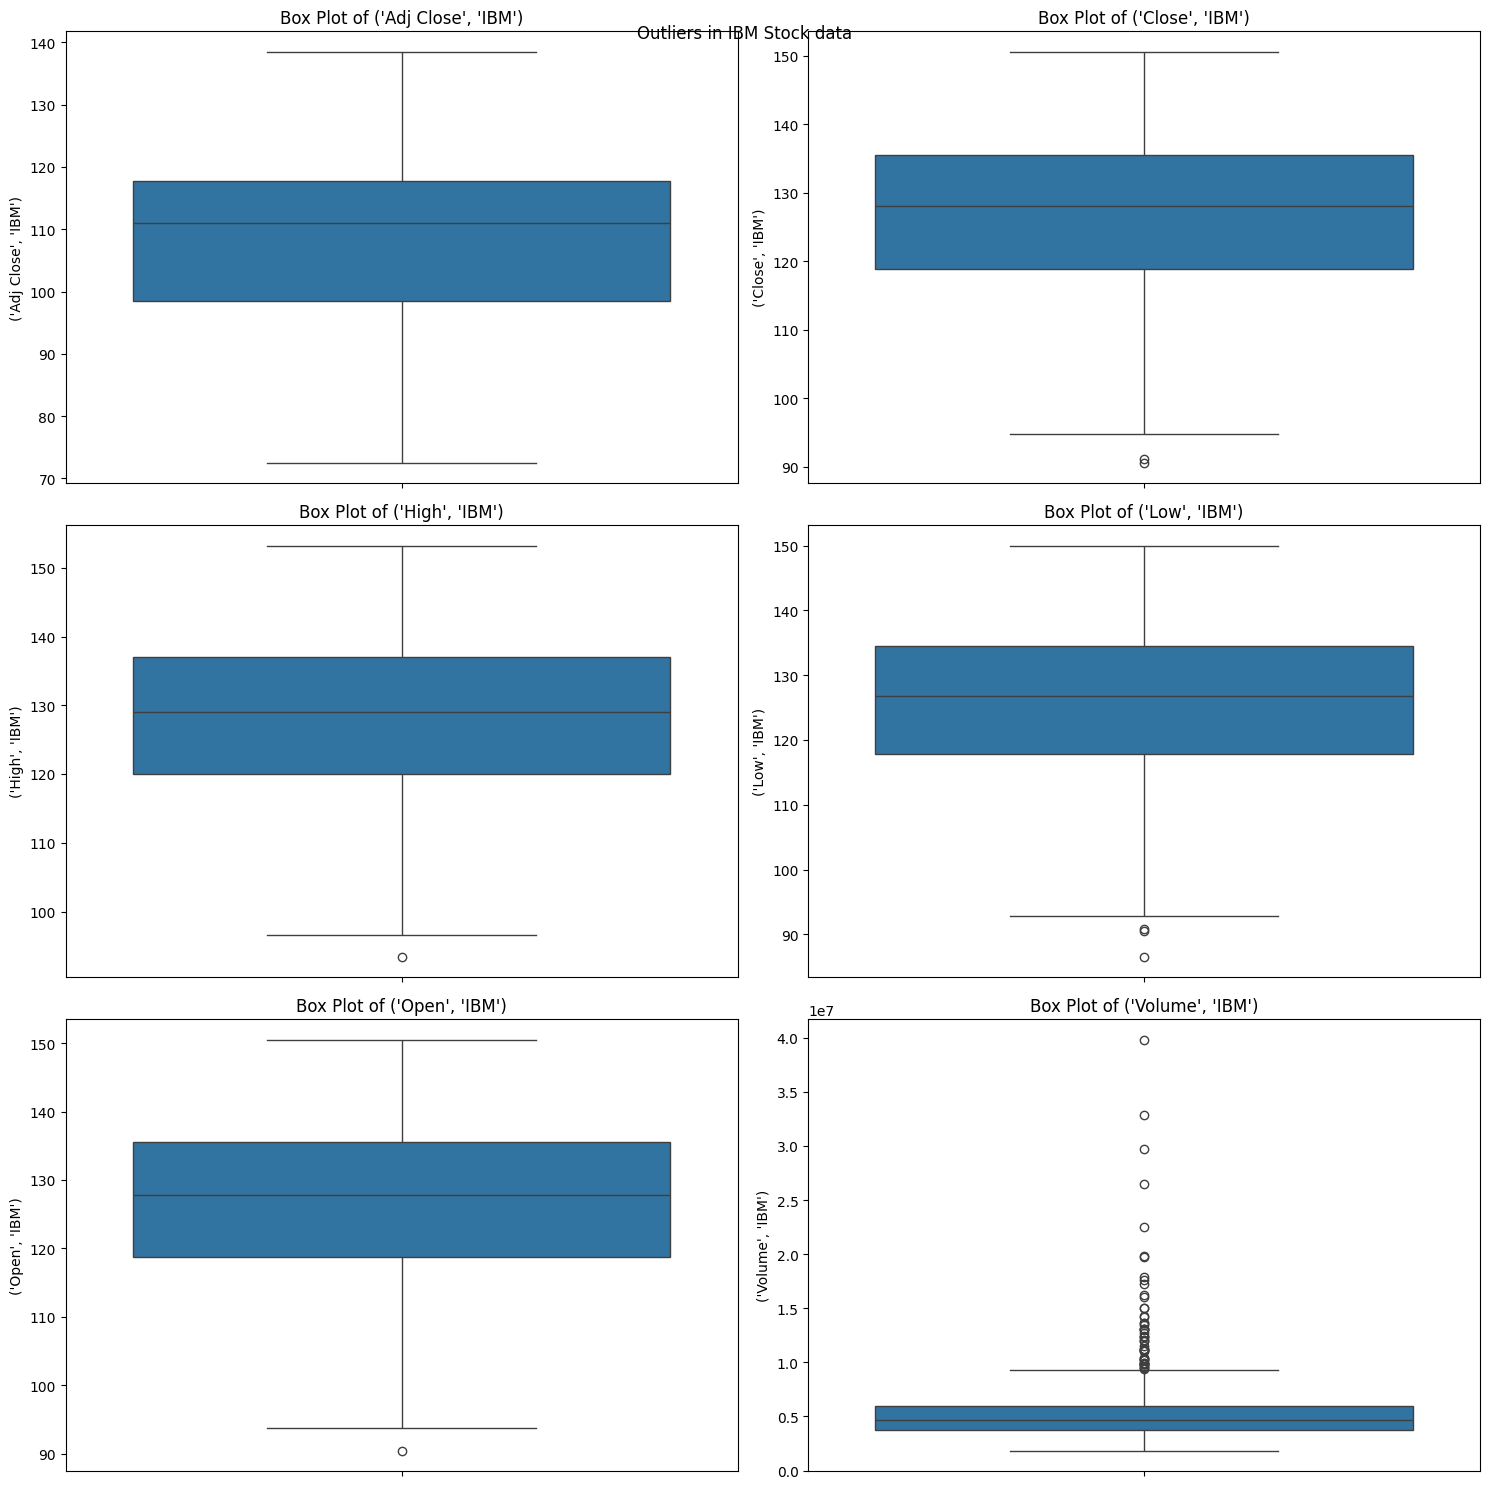


 Handling Outliers

Outlier Count Comparison (Before -> After):
('Adj Close', 'IBM'): 0 -> 0
('Close', 'IBM'): 2 -> 0
('High', 'IBM'): 1 -> 0
('Low', 'IBM'): 3 -> 0
('Open', 'IBM'): 1 -> 0
('Volume', 'IBM'): 52 -> 0


In [30]:
print("Analyzin Outliers for the IBM Stock Data")
outliers=detect_outliers(IBM_data,method='iqr',threshold=1.5)
for column,stats in outliers.items():
    print(f"\n{column}")
    print(f" Number of Outliers : {stats['outlier_count']}")
    if 'lower_bound' in stats:
        print(f" Lower Bound : {stats['lower_bound']:.2f}")
        print(f" Upper Bound : {stats['upper_bound']:.2f}")
print("\n Plotting Outliers")
plot_outliers(IBM_data)
plt.suptitle("Outliers in IBM Stock data")
plt.show()
print("\n Handling Outliers")
IBM_data=handle_outliers(IBM_data,method='clip')
outliers_after=detect_outliers(IBM_data,method='iqr',threshold=1.5)
print("\nOutlier Count Comparison (Before -> After):")
for column in outliers.keys():
        before_count = outliers[column]['outlier_count']
        after_count = outliers_after[column]['outlier_count']
        print(f"{column}: {before_count} -> {after_count}")



 Outlier Analysis of Amazon Stock Data
('Adj Close', 'AMZN')
No of Outliers : 0
Lower Bound 48.89
Upper Bound 234.08
('Close', 'AMZN')
No of Outliers : 0
Lower Bound 48.89
Upper Bound 234.08
('High', 'AMZN')
No of Outliers : 0
Lower Bound 49.73
Upper Bound 236.25
('Low', 'AMZN')
No of Outliers : 0
Lower Bound 45.75
Upper Bound 233.28
('Open', 'AMZN')
No of Outliers : 0
Lower Bound 48.86
Upper Bound 234.31
('Volume', 'AMZN')
No of Outliers : 35
Lower Bound 170750.00
Upper Bound 151944750.00
Plot Outliers


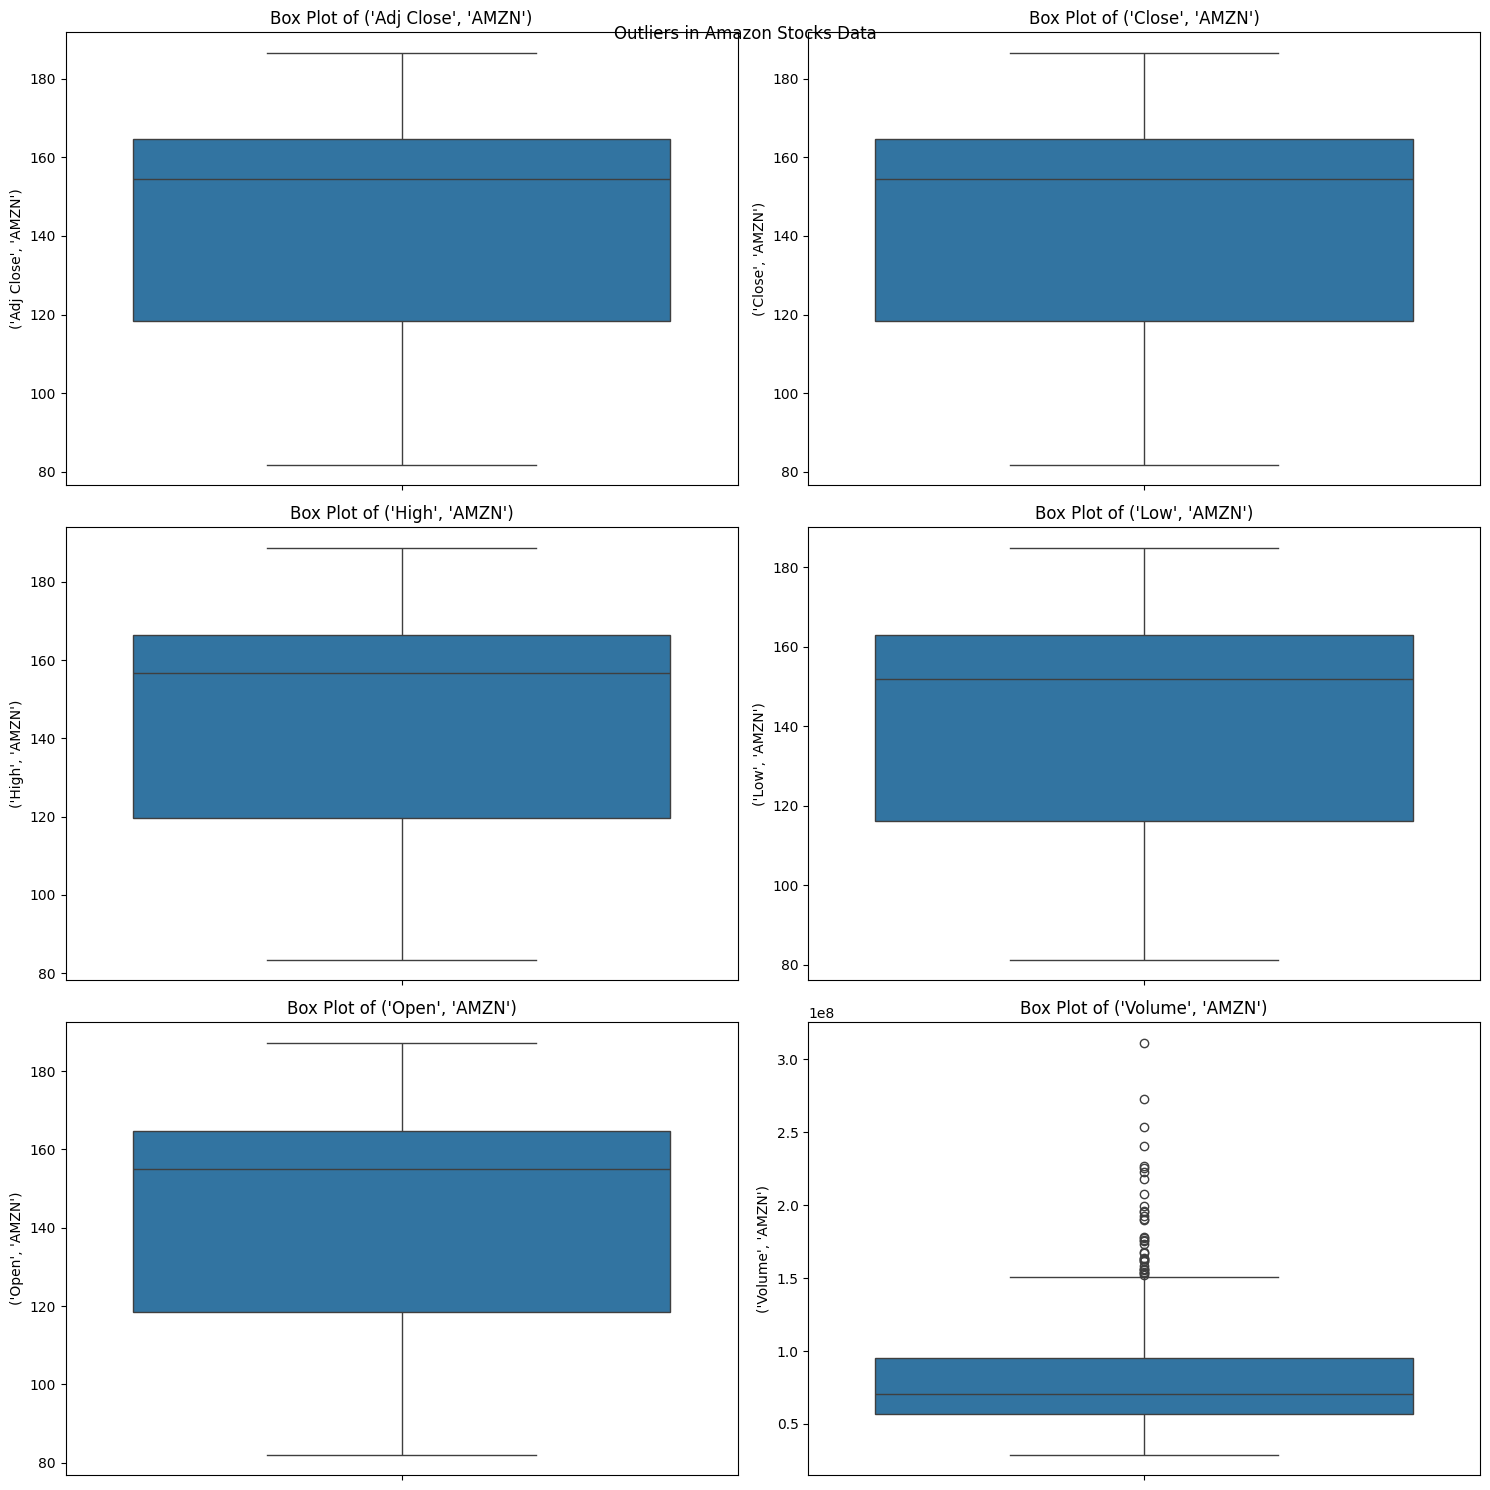


 handling Outliers...
Comparing Outliers (Before -> After)
('Adj Close', 'AMZN') 0->0
('Close', 'AMZN') 0->0
('High', 'AMZN') 0->0
('Low', 'AMZN') 0->0
('Open', 'AMZN') 0->0
('Volume', 'AMZN') 35->0


In [31]:
print("\n Outlier Analysis of Amazon Stock Data")
outliers=detect_outliers(amzn_data,method='iqr',threshold=1.5)
for column,stats in outliers.items():
    print(f"{column}")
    print(f"No of Outliers : {stats['outlier_count']}")
    if 'lower_bound' in stats:
        print(f"Lower Bound {stats['lower_bound']:.2f}")
        print(f"Upper Bound {stats['upper_bound']:.2f}")
print("Plot Outliers")
plot_outliers(amzn_data)
plt.suptitle('Outliers in Amazon Stocks Data')
plt.show()
print("\n handling Outliers...")
amzn_data=handle_outliers(amzn_data,method='clip')
outliers_after=detect_outliers(amzn_data,method='iqr',threshold=1.5)
print("Comparing Outliers (Before -> After)")
for column in outliers.keys():
    before_count=outliers[column]['outlier_count']
    after_count=outliers_after[column]['outlier_count']
    print(f"{column} {before_count}->{after_count}")


***LSTM - [Long Short Term  ]***

In [32]:
from data_preprocessing import predict_stock_prices_lstm


***For Google Data***

Processing data...
Epoch 1/100


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2448 - val_loss: 0.2413
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0534 - val_loss: 0.0247
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0200 - val_loss: 0.0052
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0101 - val_loss: 0.0070
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0096 - val_loss: 0.0059
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0091 - val_loss: 0.0054
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0081 - val_loss: 0.0054
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0103 - val_loss: 0.0072
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0079 - val_loss: 0.0050
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0071 - val_loss: 0.0054
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0086 - val_loss: 0.0060
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0

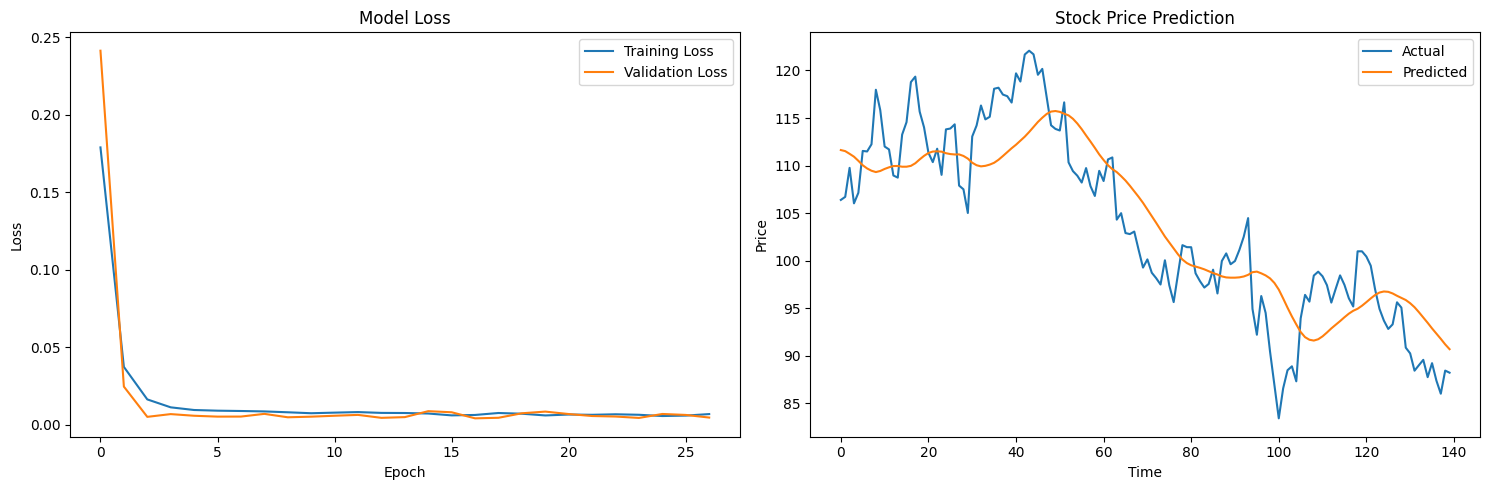


Model Performance Metrics:
MSE: 22.9226
RMSE: 4.7878
MAE: 4.1451
R2: 0.7610


In [33]:
results_googl_lstm = predict_stock_prices_lstm(
    googl_data,                    # Single DataFrame
    target_col='Close',         # Predict closing prices
    sequence_length=60,         # Use 60 days of history
    train_split=0.8,           # 80% training, 20% testing
    units=50,                  # Number of LSTM units
    dropout=0.2                # Dropout rate
)

***For Apple Data***

Processing data...
Epoch 1/100


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2218 - val_loss: 0.1108
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0310 - val_loss: 0.0143
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0136 - val_loss: 0.0065
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0118 - val_loss: 0.0050
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0085 - val_loss: 0.0047
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0091 - val_loss: 0.0047
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0081 - val_loss: 0.0046
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0070 - val_loss: 0.0059
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0074 - val_loss: 0.0067
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0095 - val_loss: 0.0045
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0071 - val_loss: 0.0045
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0

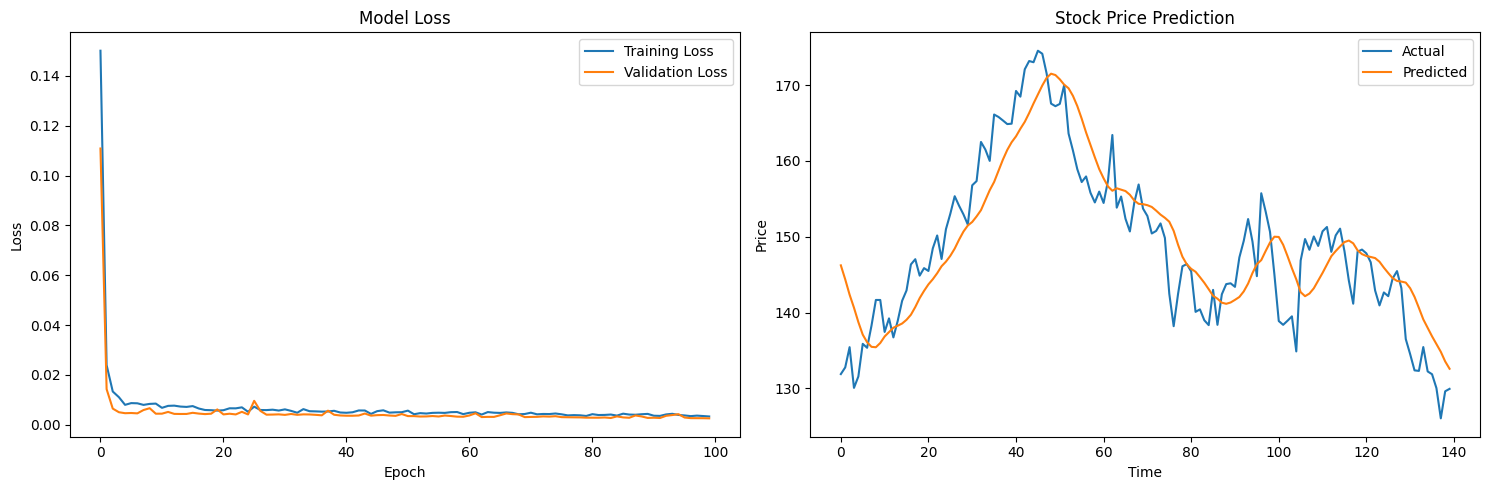


Model Performance Metrics:
MSE: 29.3740
RMSE: 5.4198
MAE: 4.5178
R2: 0.7571


In [34]:
result_aapl_lstm=predict_stock_prices_lstm(
    aapl_data, # Single DataFrame
    target_col='Close',         # Predict closing prices
    sequence_length=60,         # Use 60 days of history
    train_split=0.8,           # 80% training, 20% testing
    units=50,                  # Number of LSTM units
    dropout=0.2                # Dropout rate
    
)

***For IBM Data***

Processing data...
Epoch 1/100


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2844 - val_loss: 0.1224
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0345 - val_loss: 0.0310
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0166 - val_loss: 0.0069
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0149 - val_loss: 0.0084
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0119 - val_loss: 0.0095
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0115 - val_loss: 0.0067
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0126 - val_loss: 0.0068
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0112 - val_loss: 0.0083
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0108 - val_loss: 0.0074
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0097 - val_loss: 0.0069
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0106 - val_loss: 0.0110
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0

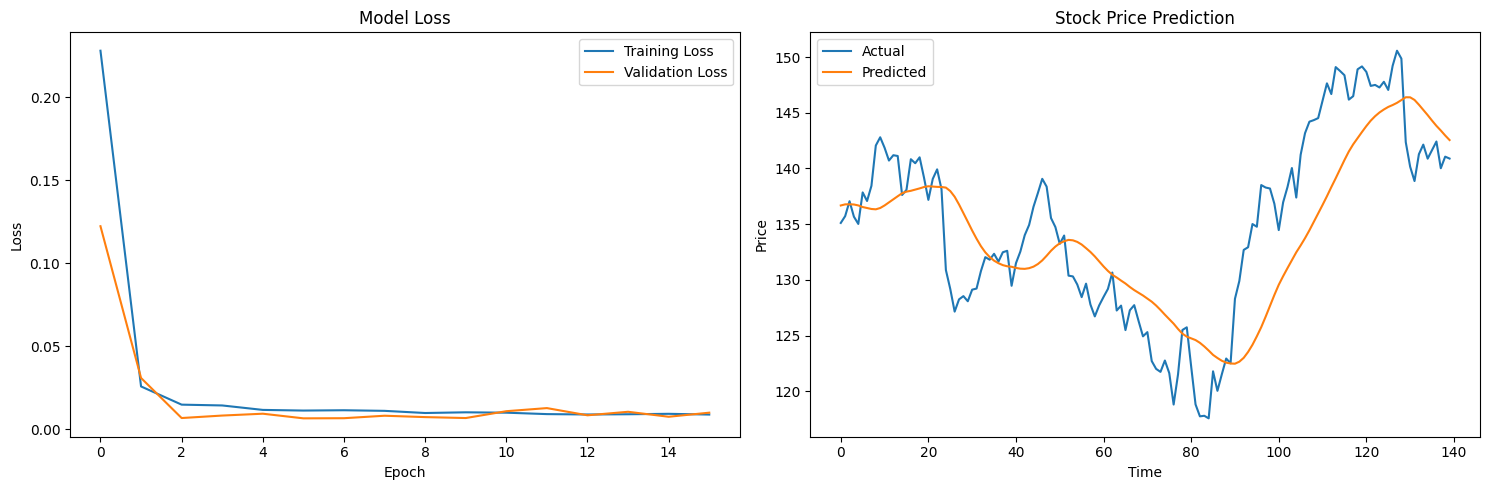


Model Performance Metrics:
MSE: 27.9719
RMSE: 5.2888
MAE: 4.3222
R2: 0.6010


In [35]:
result_ibm_lstm=predict_stock_prices_lstm(
    IBM_data, # Single DataFrame
    target_col='Close',         # Predict closing prices
    sequence_length=60,         # Use 60 days of history
    train_split=0.8,           # 80% training, 20% testing
    units=50,                  # Number of LSTM units
    dropout=0.2                # Dropout rate
    
)

***For Amazon Data***

Processing data...
Epoch 1/100


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.4592 - val_loss: 0.0262
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0422 - val_loss: 0.0228
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0183 - val_loss: 0.0256
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0144 - val_loss: 0.0303
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0154 - val_loss: 0.0299
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0131 - val_loss: 0.0250
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0157 - val_loss: 0.0247
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0130 - val_loss: 0.0272
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0136 - val_loss: 0.0225
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0122 - val_loss: 0.0231
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0125 - val_loss: 0.0217
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0

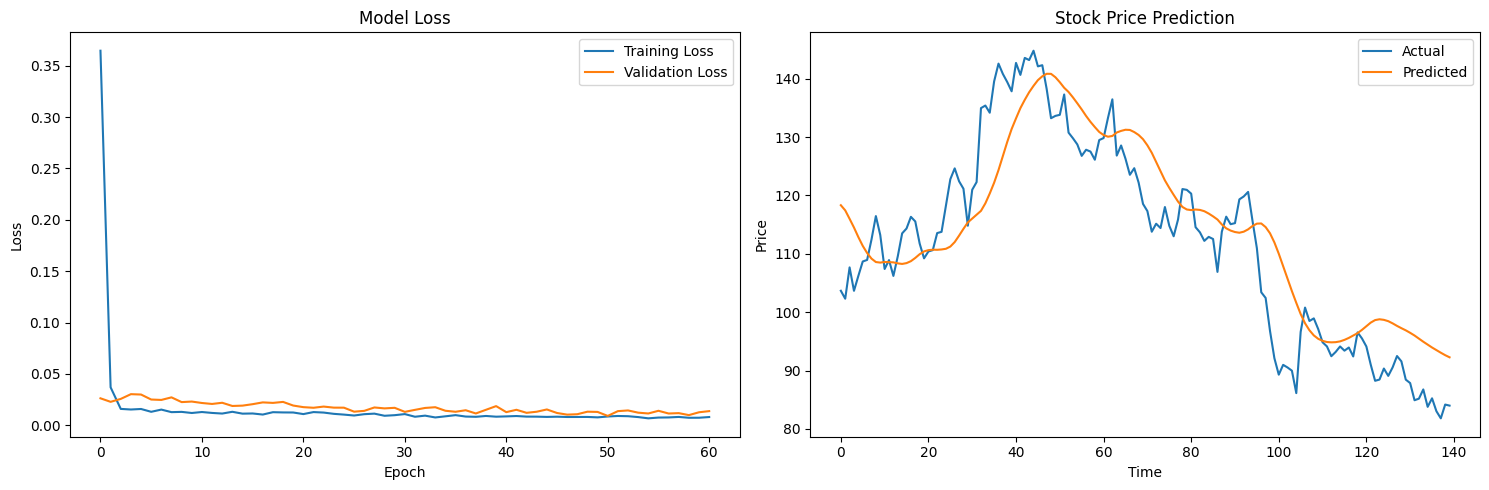


Model Performance Metrics:
MSE: 66.0927
RMSE: 8.1297
MAE: 6.6076
R2: 0.7743


In [36]:
result_amzn_lstm=predict_stock_prices_lstm(
    amzn_data, # Single DataFrame
    target_col='Close',         # Predict closing prices
    sequence_length=60,         # Use 60 days of history
    train_split=0.8,           # 80% training, 20% testing
    units=50,                  # Number of LSTM units
    dropout=0.2                # Dropout rate    
)

***GRU -[Gated Recurrent Unit]***

***For Google Data***

***Temporal Fusion Transformer***